In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

In [3]:
# Load the dataset from the csv file using pandas 
# best way is to mount the drive on colab and  
# copy the path for the csv file 
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
# Grab a peek at the data 
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [6]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
# Only 0.17% of all transactions are fraudulent. The data is highly imbalanced. 
# Let's apply our unbalanced models first, and if we don't get good accuracy, we can find a way to balance this dataset. 
# But first, let's implement the model without it and balance the data only when needed

In [8]:
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# As we can clearly see from this average monetary transaction there are more fraudulent transactions. This makes this problem

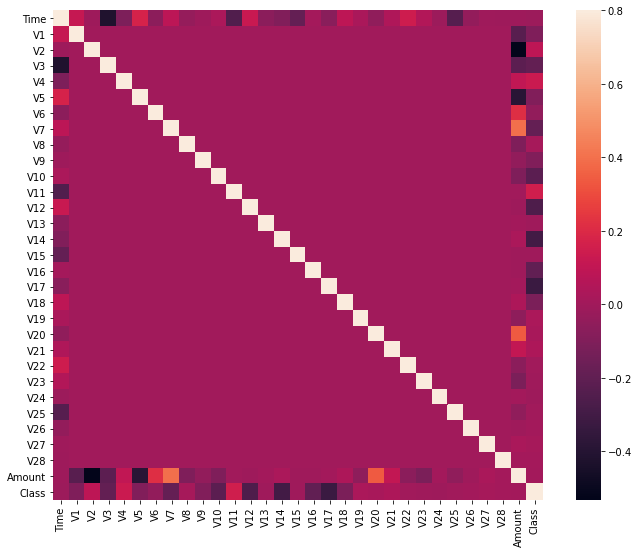

In [10]:
# Correlation graphically gives us an idea of how features correlate with each other and can help us predict which features are most important to a forecast
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [11]:
# In the heat map, we can clearly see that most of the features are not correlated with other features, but there are some features that are positively or negatively correlated with each other. For example, V2 and V5 are strongly negatively correlated with the Amount function. 
# We also see some correlation with the V20 and Amount. 
# This gives us a deeper understanding of the data available to us

In [12]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [13]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [14]:
# I will say in advance that in the course of my testing, the Random Forest algorithm coped best with the task, so I'll start with it
# Building the Random Forest Classifier (RANDOM FOREST)  
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [15]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9995611109160493
The precision is 0.9866666666666667
The recall is 0.7551020408163265
The F1-Score is 0.8554913294797689
The Matthews correlation coefficient is0.8629589216367891


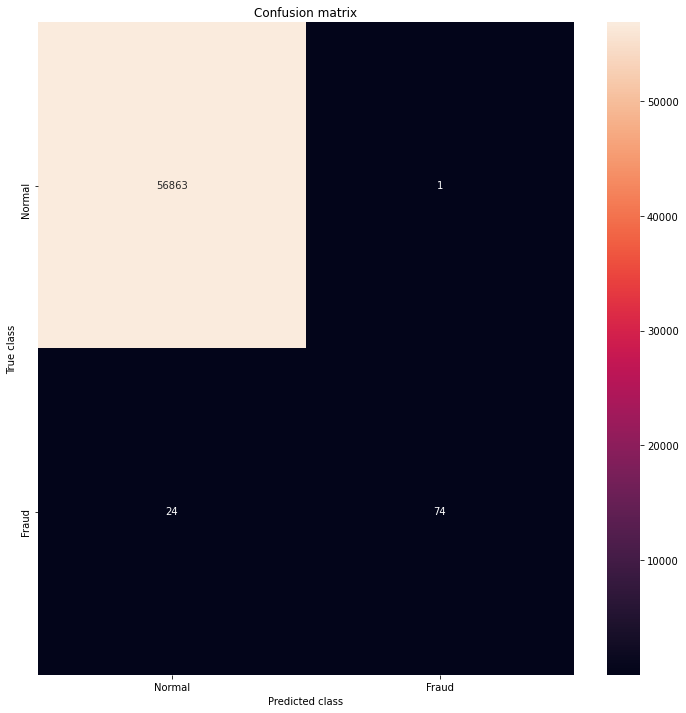

In [16]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [17]:
# Let's check the rest of the algorithms
# Importing Libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics 

In [18]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xTrain, yTrain)
# predictions 
yPred = decision_tree.predict(xTest)
acc_decision_tree = round(decision_tree.score(xTrain, yTrain) * 100, 2)
acc_decision_tree

100.0

In [19]:
# While the decision tree
# does a good job too
# Let's take a closer look
n_outliers2 = len(fraud) 
n_errors2 = (yPred != yTest).sum() 
print("The model used is Decision Tree") 
  
acc2 = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec2 = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec2 = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC2 = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Decision Tree
The accuracy is 0.9995611109160493
The precision is 0.9866666666666667
The recall is 0.7551020408163265
The F1-Score is 0.7809523809523811
The Matthews correlation coefficient is0.8629589216367891


In [20]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xTrain, yTrain)
y_pred = random_forest.predict(xTest)
random_forest.score(xTrain, yTrain)
acc_random_forest = round(random_forest.score(xTrain, yTrain) * 100, 2)
acc_random_forest

100.0

In [21]:
# As I wrote earlier, the best result is given by a Random Forest, so there is no point in describing in detail

In [22]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(xTrain, yTrain)
y_pred = gaussian.predict(xTest)
acc_gaussian = round(gaussian.score(xTrain, yTrain) * 100, 2)
acc_gaussian
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

accuracy: 0.9930128857835048


In [23]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(xTrain, yTrain)
y_pred = perceptron.predict(xTest)
acc_perceptron = round(perceptron.score(xTrain, yTrain) * 100, 2)
acc_perceptron
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9981917769741231


In [24]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(xTrain, yTrain)
y_pred = linear_svc.predict(xTest)
acc_linear_svc = round(linear_svc.score(xTrain, yTrain) * 100, 2)
acc_linear_svc
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.20      0.32        98

    accuracy                           1.00     56962
   macro avg       0.86      0.60      0.66     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9984902215512096


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)
y_pred = sgd.predict(xTest)
acc_sgd = round(sgd.score(xTrain, yTrain) * 100, 2)
acc_sgd
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9982093325374811


In [26]:
# K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xTrain, yTrain)
y_pred = knn.predict(xTest)
acc_knn = round(knn.score(xTrain, yTrain) * 100, 2)
acc_knn
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.09      0.17        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.58     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9984375548611355


In [27]:
# Support Vector Machines
svc = SVC()
svc.fit(xTrain, yTrain)
y_pred = svc.predict(xTest)
acc_svc = round(svc.score(xTrain, yTrain) * 100, 2)
acc_svc
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9982795547909132


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=1)
Ada.fit(xTrain, yTrain)
y_pred = Ada.predict(xTest)
acc_add = round(Ada.score(xTrain, yTrain) * 100, 2)
acc_add
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9993153330290369


In [29]:
# XGBoost
import xgboost as xgb
XGB = xgb.XGBClassifier(random_state=1)
XGB.fit(xTrain, yTrain)
y_pred = XGB.predict(xTest)
acc_XGB = round(XGB.score(xTrain, yTrain) * 100, 2)
acc_XGB
print(classification_report(yTest, y_pred))
print("accuracy:",metrics.accuracy_score(yTest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

accuracy: 0.9996313331694814


In [30]:
# Now let's create a table and see what we get
import pandas as pd

Result = pd.DataFrame({
    'MODEL': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest','Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','Decision Tree', 'AdaBoost', 'XGBoost'],
    'SCORE': [acc_linear_svc, acc_knn, acc_sgd,acc_random_forest, 
              acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_XGB, acc_add]})
Result = Result.sort_values(by='SCORE', ascending=False)
Result = Result.set_index('SCORE')
Result.head(10)

,MODEL
SCORE,
100.00,Random Forest
100.00,Decision Tree
100.00,AdaBoost
99.93,XGBoost
99.86,KNN
99.85,Support Vector Machines
99.82,Logistic Regression
99.82,Perceptron
99.82,Stochastic Gradient Decent
